# Cognitive Algorithms - Assignment 3 (30 points)
Cognitive Algorithms        
Summer term 2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on May 23, 2018 10am via ISIS **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

Group: 21        
Members:  Cejudo Grano de Oro, José Eduardo
          Peng, Yizhou
          Pipo, Aiko Lars
          Raj, Sourabh
          Xiao, Shijian        

# Part 1: Theory (13 points)
---
### Task 1: Multiple Choice Questions (2 points)

**A)** The goal of LDA is to find a $\mathbf w \in \mathbb{R}^d$ that ...
- [ ] minimizes mean class difference and minimizes variance in each class              
- [ ] minimizes mean class difference and maximizes variance in each class                    
- [ ] maximizes mean class difference and maximizes variance in each class                
- [X] maximizes mean class difference and minimizes variance in each class                    

**B)** Below you can see a figure that shows a data set of two classes (blue and yellow) and three different lines. Assume NCC is trained on the given data. Which line corresponds to the resulting decision boundary of NCC.
- [ ] The black line resembles the decision boundary given by NCC.              
- [X] The red line resembles the decision boundary given by NCC.               
- [ ] The green line resembles the decision boundary given by NCC.              

![Figure_1](Figure_1.png)

### Task 2: Covariance (11 points)
Let $X$ and $Y$ be two random variables. In the lecture you learned about covariance and correlation.
$$\text{Cov}(X,Y) = \mathbb{E}(((X-\mathbb{E}(X))(Y-\mathbb{E}(Y)))$$
$$\text{Corr}(X,Y) = \frac{\text{Cov}(X,Y)}{ \sqrt{\mathbb{V}(X)} \sqrt{\mathbb{V}(Y)} }$$

**A) (1 point)** Let $X$ be a random variable. Show that 
$$\text{Cov}(X,X) = \mathbb{V}(X)$$
where the variance of a random variable is defined as 
$$\mathbb{V}(X) =  \mathbb{E}((X-\mathbb{E}(X))^2) = \mathbb{E}(X^2) - \mathbb{E}(X)^2$$

$$\text{Cov}(X,X) = \mathbb{E}(((X-\mathbb{E}(X))(X-\mathbb{E}(X)))$$
$$= \mathbb{E}(X^2-2X\mathbb{E}(X)+\mathbb{E}(X)^2) = \mathbb{E}(X^2) - 2\mathbb{E}(X)\mathbb{E}(X)+\mathbb{E}(X)^2$$
$$= \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \mathbb{V}(X)$$  

**B) (1 point)** Use your results from A) to calculate the correlation
$$\text{Corr}(X,X)$$

$$\text{Corr}(X,X) = \frac{\text{Cov}(X,X)}{ \sqrt{\mathbb{V}(X)} \sqrt{\mathbb{V}(X)} }$$
$$ = \frac{\mathbb{V}(X)}{ \mathbb{V}(X) } = 1$$

**C) (3 points)** Show that the algebraic formula for the variance can be generalized to covariance, i.e. show for two random variables $X$ and $Y$ that the covariance can be simplified to
$$\text{Cov}(X,Y) = \mathbb{E}(XY) - \mathbb{E}(X) \mathbb{E}(Y)$$

$$\text{Cov}(X,Y) = \mathbb{E}(((X-\mathbb{E}(X))(Y-\mathbb{E}(Y)))$$
$$= \mathbb{E}(XY - X\mathbb{E}(Y) - Y\mathbb{E}(X) + \mathbb{E}(X)\mathbb{E}(Y))$$ 
$$= \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y) - \mathbb{E}(Y)\mathbb{E}(X) + \mathbb{E}(X)\mathbb{E}(Y)$$
$$= \mathbb{E}(XY) - \mathbb{E}(X) \mathbb{E}(Y)$$


**D) (6 points)** Let $X \in \mathbb R^{D \times N}$ be a data matrix that holds for each random variable $X_1, \ldots X_D \;$ $N$ observations, i.e. $X_d \in \mathbb{R}^N$. Use your results from task A)-C) to show, that if the data is centered ($\forall_{d=1}^{D} \mathbb{E}(X_d) = 0$) the empirical estimate of the covariance matrix is given by $S$, i.e.
$$\Sigma = \left( \begin{array}{rrrr} \text{Cov}(X_1,X_1) & \text{Cov}(X_1,X_2) & \ldots & \text{Cov}(X_1,X_D) \\ \text{Cov}(X_2,X_1) & \text{Cov}(X_2,X_2) & \ldots & \text{Cov}(X_2,X_D) \\ \vdots & \vdots & \ddots & \vdots \\ \text{Cov}(X_D,X_1) & \ldots & \ldots & \text{Cov}(X_D,X_D) \end{array}	\right) \approx \frac{1}{N} X X^T = S$$
*Hint:* Use the following properties     
- $\mathbb{E}(X_d) \approx \frac{1}{N} \sum_{n=1}^{N} X_{d,n} = 0$               
- $\mathbb{E}(X_d X_{d'}) \approx \frac{1}{N} \sum_{n=1}^{N} X_{d,n} X_{d',n}$                  
- $\text{Cov}(X_d, X_{d'}) = \text{Cov}(X_{d'}, X_d)$                      

$$\text{Cov}(X_i, X_j) = \mathbb{E}(X_i X_j) \approx \frac{1}{N} \sum_{n=1}^{N} X_{i,n} X_{j,n}$$
$$ = \frac{1}{N} \sum_{n=1}^{N} X_{i,n} X_{n,j}^T = \frac{1}{N} (XX^T)_{i,j} = S_{i,j} $$

# Part 2: Programming (17 points)
---

In this assignment you will compare the three linear classification algorithms that you encountered in the lecture - the Perceptron, the Nearest Centroid Classifier (NCC) and the Linear Discriminant Analysis (LDA). This comparision is done on a toy data set and on two different real data sets - the USPS data from the last assignment, and a Brain-Computer Interface (BCI) data set. 

Download the ```usps.mat``` and ```bcidata.mat``` data sets from the ISIS web site, if not done yet. Your task will be to implement LDA and use the provided code to analyse the data. 

The BCI data set consists of preprocessed EEG data $X \in\mathbb{R}^{5 \times 62 \times 5322}$ and stimulus labels $Y \in\mathbb R^{2 \times 5322}$ during a copy-spelling paradigm with a P300 speller. The data matrix $X$ contains 5 selected time windows of EEG activity at 62 electrodes after a visual stimulus was presented on the screen in front of the participant. If the first row of $Y$ is 1, the stimulus was a target stimulus, if the second row of $Y$ is 1, the stimulus was a non-target stimulus. The goal is to predict if the simulus was a target or not given the EEG.        
*Below you can find the provided code. Change the code only where indicated. See Part 2 Task A) for more information.*

In [1]:
import scipy as sp
import scipy.io as io
from scipy.linalg import inv
import pylab as pl
import numpy as np
%matplotlib inline

In [70]:
def train_lda(X,Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    indw1 = (Y == +1).nonzero()[0]
    indw2 = (Y == -1).nonzero()[0]
    w1 = np.sum(X[:,indw1],axis=1)/indw1.shape[0]
    w2 = np.sum(X[:,indw2],axis=1)/indw2.shape[0]
    S = np.cov(X)
    w = sp.linalg.solve(S,w1-w2)
    beta = 0.5*np.transpose(w).dot(w1+w2) + np.log(indw1.shape[0]/indw2.shape[0])
    
    return w,beta
    
    
def load_usps_data(fname, digit=3):
    ''' Loads USPS (United State Postal Service) data from <fname> 
    Definition:  X, Y = load_usps_data(fname, digit = 3)
    Input:       fname   - string
                 digit   - optional, integer between 0 and 9, default is 3
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels
                             (1 - picture displays <digit>, -1 - otherwise)                           
    '''
    # load the data
    data = io.loadmat(fname)
    # extract images and labels
    X = data['data_patterns']
    Y = data['data_labels']
    Y = Y[digit,:]
    return X, Y
    
    
def load_bci_data(fname):
    ''' Loads BCI data (one subject, copy-spelling experiment) from <fname> 
    Definition:  X, Y = load_bci_data(fname)
    Input:       fname   - string
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels 
                            (1- target, -1 - non-target)                         
    '''
    # load the data
    data = io.loadmat(fname)
    # extract time-electrode features and labels
    X = data['X']
    Y = data['Y']
    # collapse the time-electrode dimensions
    X = sp.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
    # transform the labels to (-1,1)
    Y = sp.sign((Y[0,:]>0) -.5)
    return X,Y

def train_perceptron(X,Y,iterations=200,eta=.1):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
    '''
    #include the bias term by adding a row of ones to X 
    X = sp.concatenate((sp.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = sp.ones((X.shape[0]))/X.shape[0]
    for it in sp.arange(iterations):
        # indices of misclassified data
        wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            m = wrong[sp.random.randint(0, wrong.shape[0]-1)]
            #update weight vector (use variable learning rate (eta/(1.+it)) )
            weights = weights  + (eta/(1.+it)) * X[:, m] * Y[m]; 
            # compute accuracy
            wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
    b = -weights[0] 
    w = weights[1:]
    return w,b

def train_ncc(X,Y):
    ''' Trains a nearest centroid classifier
    Definition:  w, b   = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    #class means
    mupos = sp.mean(X[:,Y>0],axis=1)
    muneg = sp.mean(X[:,Y<0],axis=1)
    #weight vector and bias term
    w = mupos - muneg
    b = (w.dot(mupos) + w.dot(muneg))/2.
    return w,b
    
def plot_histogram(X, Y, w, b, cname):
    ''' Plots a histogram of classifier outputs (w^T X) for each class 
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification  
                    cname   - name of the classifier 
    '''
    pl.hist((w.dot(X[:,Y<0]), w.dot(X[:,Y>0])))
    pl.xlabel("w^T X")
    pl.title(cname + ' ' + str(100*sp.sum(sp.sign(w.dot(X)-b)==Y)/X.shape[1]) + "%")   
     
def compare_classifiers_toy():
    '''
    Compares 3 different linear classifiers (Nearest-Centroid, Linear Discriminant Analysis, 
    Perceptron) on 2 dimensional toy data
    '''
    #generate 2D data
    N =500
    cov = sp.array([[5, 0], [0, 0.5]])
    #cov = sp.array([[10, 0], [0, 10]])
    x1 = sp.random.multivariate_normal([-0.5, -0.5], cov, N) 
    x2 = sp.random.multivariate_normal([2.5, 0.5], cov, N) 
    X = sp.vstack((x1, x2)).transpose()
    Y = sp.hstack((sp.ones((N)), -1*sp.ones((N))))
    
    #train NCC, LDA and Perceptron
    w_ncc,b_ncc = train_ncc(X,Y)
    w_lda,b_lda = train_lda(X,Y)
    w_per,b_per = train_perceptron(X,Y)
       
    #plot result
    pl.figure()
    b_ncc = 10*b_ncc / sp.linalg.norm(w_ncc)
    b_lda = 10*b_lda / sp.linalg.norm(w_lda)
    b_per = 10*b_per / sp.linalg.norm(w_per)
    w_lda = 10*w_lda / sp.linalg.norm(w_lda)
    w_ncc = 10*w_ncc / sp.linalg.norm(w_ncc)
    w_per = 10*w_per / sp.linalg.norm(w_per)
    pl.plot([-w_lda[1], w_lda[1]], [w_lda[0]+b_lda/w_lda[1], -w_lda[0]+b_lda/w_lda[1]], 
        color = 'k', label='LDA: Acc ' + str(100*sp.sum(sp.sign(w_lda.dot(X)-b_lda)==Y)/X.shape[1]) + "%")
    pl.plot([-w_ncc[1], w_ncc[1]], [w_ncc[0]+b_ncc/w_ncc[1], -w_ncc[0]+b_ncc/w_ncc[1]], 
        color = 'r', linestyle = '--', label='NCC: Acc ' + str(100*sp.sum(sp.sign(w_ncc.dot(X)-b_ncc)==Y)/X.shape[1]) + "%")
    pl.plot([-w_per[1], w_per[1]], [w_per[0]+b_per/w_per[1], -w_per[0]+b_per/w_per[1]], 
        color = 'g', linestyle = ':', label='PER: Acc ' + str(100*sp.sum(sp.sign(w_per.dot(X)-b_per)==Y)/X.shape[1]) + "%")
    pl.plot(x1[:,0], x1[:,1], 'y+')
    pl.plot(x2[:,0], x2[:,1], 'b+')
    pl.axis('equal')
    pl.legend(loc=1)

def compare_classifiers(usps = True, digit = 8):
    '''
    Compares 3 different linear classifiers (Nearest-Centroid, Linear Discriminant Analysis, 
    Perceptron) on either USPS data (for usps=True) or on BCI data (for usps = False)
    '''
    if usps: #load usps data set
        X,Y = load_usps_data('usps.mat',digit)
        tit = 'USPS(' + str(digit) + ')'
    else: #load bci data set 
        X,Y = load_bci_data('bcidata.mat')
        tit = 'BCI'
    
    #Use crossvalidation to estimate the training and test accuracies
    acc_cv = sp.zeros((5, 6))
    (acc_cv[:,0],acc_cv[:,1]) = crossvalidate(X,Y,trainfun=train_ncc)
    (acc_cv[:,2],acc_cv[:,3]) = crossvalidate(X,Y,trainfun=train_lda)
    (acc_cv[:,4],acc_cv[:,5]) = crossvalidate(X,Y,trainfun=train_perceptron)
        
    #Plot the crossvalidation output
    pl.figure()
    ax1 = pl.subplot2grid((2,3), (0,0), colspan = 3)
    pl.bar(sp.array([1, 2, 3, 4, 5, 6]) - 0.4,  acc_cv.mean(0), width = 0.8,
        yerr =  acc_cv.std(0), ecolor = 'k', color = 'g')
    pl.xticks([1, 2, 3, 4, 5, 6], ['NCC tain', 'NCC test', 'LDA train', 'LDA test', 
        'PER train', 'PER test'])
    pl.xlim([0, 7])
    pl.ylim([0.5, 1])
    pl.ylabel('CV Accuracy')
    pl.title(tit + ' data set')

    #Train the classifiers and plot the output histograms
    w_ncc,b_ncc = train_ncc(X,Y)
    w_lda,b_lda = train_lda(X,Y)
    w_per,b_per= train_perceptron(X,Y)
    
    ax2 = pl.subplot2grid((2,3), (1,0))
    plot_histogram(X, Y, w_ncc, b_ncc, 'NCC')
    ax3 = pl.subplot2grid((2,3), (1,1))
    plot_histogram(X, Y, w_lda, b_lda, 'LDA')
    ax4 = pl.subplot2grid((2,3), (1,2))
    plot_histogram(X, Y, w_per, b_per, 'PER')

def crossvalidate(X,Y, f=5, trainfun=train_ncc):
    ''' 
    Test generalization performance of a linear classifier by crossvalidation
    Definition:     crossvalidate(X,Y, f=5, trainfun=train_ncc)
    Input:      X        -  DxN array of N data points with D features
                Y        -  1D array of length N of class labels
                f        - number of cross-validation folds
                trainfun - function for linear classification training
    Output:     acc_train - (f,) array of accuracies in test train folds
                acc_test  - (f,) array of accuracies in each test fold
    '''
    #N = f*(X.shape[-1]/f)
    #idx = sp.reshape(sp.arange(N),(f,N/f))
    N = f*(X.shape[-1]//f)
    idx = sp.reshape(sp.arange(N),(f,N//f))
    acc_train = sp.zeros((f))
    acc_test = sp.zeros((f))
    
    for ifold in sp.arange(f):
        testidx = sp.zeros((f),dtype=bool)
        testidx[ifold] = 1
        test = idx[testidx,:].flatten()
        train = idx[~testidx,:].flatten()
        w,b = trainfun(X[:,train],Y[train])
        acc_train[ifold] = sp.sum(sp.sign(w.dot(X[:,train])-b)==Y[train])/sp.double(train.shape[0])
        acc_test[ifold] = sp.sum(sp.sign(w.dot(X[:,test])-b)==Y[test])/sp.double(test.shape[0])
    
    return acc_train,acc_test

**A) (7 points)** Implement a linear discriminant analysis (LDA) classifer by completing the function stub  ```train_lda```, that is, find a 
vector $\mathbf{w}$ such that  
$$\mathbf{w} = \underset{\mathbf{w}}{\text{argmax}} \; \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_{W} \mathbf{w}}$$
where $S_B$ denotes the 'between-class scatter' and $S_W$ denotes the 'within-class scatter'
\begin{eqnarray*}
S_B &= & (\mathbf w_+ - \mathbf w_{-})(\mathbf w_+ - \mathbf w_{-})^T \\
S_W &= & \frac{1}{N_{+}} \sum_{i=1}^{N_{+}}(\mathbf x_{+i} - \mathbf w_{+})  (\mathbf x_{+i} - \mathbf w_{+})^T + \frac{1}{N_{-}} \sum_{i=1}^{N_{-}}(\mathbf x_{-i} - \mathbf w_{-})  (\mathbf x_{-i} - \mathbf w_{-})^T
\end{eqnarray*}
and $\mathbf w_{+}$, $\mathbf w_{-}$ denote the respective class means. 

**B) (5 points)** Test your LDA implementation with the provided function ```compare_classifiers_toy```. It generates a 2D toy data set and plots the resulting separating hyperplanes for the three linear classification methods. Answer the following short questions: 
- Run the function several times - what do you notice for the Perceptron as compared to NCC or LDA? In one sentence, explain the behaviour of the perceptron. 
- Have a look in the code how the toy data is generated - is LDA optimal for this type of data? Why?
- How would you have to change the data generation such that NCC and LDA yield the same result? Why?



- The classification accuracy of the perceptron is often between the accuracy of the NCC and the LDA method. This can be interpreted as that the perceptron is in the midway of the two aforementioned methods. Whereas the NCC does not take into account the correlation of the data, it seems that the perceptron does up to some extent, but never reaching LDA performance (which explicitly minimizes the intra-class variance).
- The toy data consists of two clouds of data with different centers and the same diagonal covariance matrix. The variances of each variable are different, causing that the data is more 'spread' in the x than the y direction in this particular case. An ideal method for the classification of this dataset would take into account the intra-class variance, which is what LDA does, so we can assume that this method is a good choice. In fact, its accuracy is maximum compared with NCC and the percetron for this dataset. 
- The NCC classifier only considers the centroids of the data for classification without taking into account the variance of the dimensions invoved. Therefore, in case we have the same variance for all dimensions, the NCC and the LDA classifiers would yield the same result. This can be empirically demonstrated by setting the covariance matrix to a diagonal matrix with all elements equal to a certain variance (the results are independent of this value as long as the variance for each dimension is the same). 


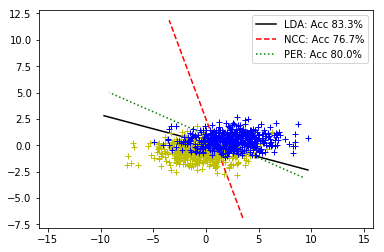

In [67]:
compare_classifiers_toy()

**C) (1 points)** Call ```compare_classifiers``` for a digit of your choice of the USPS data set, as well as for the BCI data. It plots the histogram of classifier outputs and the classification accuracies for the NCC, the LDA and the perceptron. Which algorithm (Nearest Centroid Classifier, Linear Discriminant Analysis or Perceptron) would you prefer for which task? Why?

**[Your answers for C) here]**

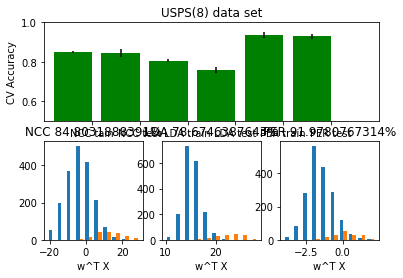

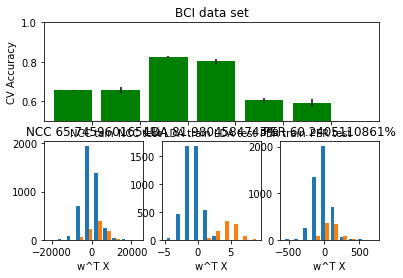

In [71]:
compare_classifiers()
compare_classifiers(False)

**D) (4 points)** Briefly explain in your own words how crossvalidation is done. To do so, you can examine the function ```crossvalidate```. When we want to compare the performance of different classifiers, which values should we look at - the train or the test accuracies? Why?


Crossvalidation is a technique for assessing the performance of (usually) a predictive model. The dataset is partitioned into blocks of data, and these blocks will be rearranged into several datasets containing both training and testing data. This approach will help to avoid overfitting, i.e, obtaining a high accuracy in the training set while a poor performance in the test data. Therefore, the generalization properties of the model are expected to be more robust than when using a single training and testing dataset. 
Moreover, in order to assess the performance of our model the test accuracies should be chosen instead of the training accuracies. This is again a way to make sure that our model is not getting too close to the training data and therefore losing its ability to generalize to non-seen data.